# Highlights
- Class Imbalance
- Incosistent image file type
- Incosistent image size
- Weighted Sampler
- Adam Optimisation Algorithm

# About the challenge

- The goal of this hackathon is to classify soil images into four soil types: Alluvial soil, Black soil, Red Soil, and Clay soil.
- Upon analyzing the dataset, I found that the dataset is highly imbalanced, prompting me to apply some imbalance treatment before training the model
- I have curated a to-do list containing the approaches I will take to solve this imbalance problem.

```python
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    ax=ax,
    x=train_df['soil_type'].value_counts().index,
    y=train_df['soil_type'].value_counts().values,
    color='green'
)

counts_str = "\n".join([f"{soil}: {count}" for soil, count in train_df['soil_type'].value_counts().items()])
ax.text(
    1.0105, 0.5, counts_str, transform=ax.transAxes,
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'),
    fontsize=12, va='center'
)

plt.xlabel('soil_type')
plt.ylabel('count')
plt.show()  # Conclusion - Alluvial soil appears more numbers of times than that of average number of times rest 3 are occuring
```

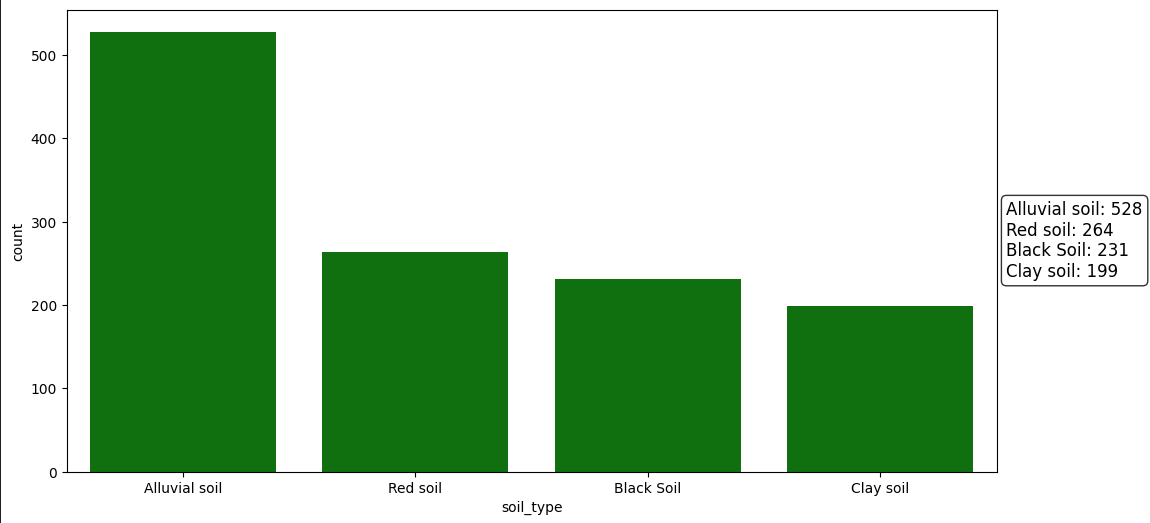

## Handling Imbalance
From the above viz we can see that Alluvial Soil occurs more number of times. Based on the evaluation criteria, which is **min F1 score** training a model on such imbalanced dataset won't give appreciable results. Following techniques can be employed to make the dataset balanced

* Data Augementation
* Focal Loss
* Class Weights
* **WeightedRandomSampler**
* Loader

## WeightedRandomSampler

The WeightedRandomSampler is a PyTorch utility that helps address class imbalance by:

Giving each sample a sampling probability proportional to its class weight

Ensuring underrepresented classes get selected more frequently during training

Working by assigning higher weights to minority class samples

```# Assign a weight for each sample

sample_weights = [class_weights[label] for label in labels]
sample_weights = torch.DoubleTensor(sample_weights) # Convert back to tensor double currently float

sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True) # Initialised sampler